# Getting the information


In [1]:
#@title Libraries
import requests
from google.colab import drive
import pandas as pd
import os
from bs4 import BeautifulSoup
import json
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#@title Connecting to Drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#@title Reading the csv file

%cd /content/drive/MyDrive/Colab Notebooks/WebAnalytics/final

songs_info = pd.read_csv('song_feat_moods.csv')

df = pd.read_csv('song_feat_moods.csv')
df = df.iloc[:, 1:]
df

/content/drive/MyDrive/Colab Notebooks/WebAnalytics/final


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,mood,popularity,release_date
0,0.439,0.482,0,-8.226,1,0.0946,0.58300,0.000000,0.1420,0.368,179.884,5vK8ILrHjXjdZJHp0AtEVJ,185554,4,chill,48,2022-03-04
1,0.766,0.333,7,-13.775,0,0.0558,0.82400,0.001700,0.1590,0.450,95.951,0mzvDQW1IgLuXAwD5YMN6i,126985,4,chill,49,2021-03-12
2,0.757,0.631,0,-6.886,1,0.0302,0.00703,0.008650,0.0931,0.264,125.983,1L4f4kyGeaLdZeVhPLaD8j,185813,4,chill,47,2021-12-09
3,0.734,0.425,9,-8.585,1,0.1170,0.79000,0.000013,0.1070,0.361,80.898,4IKSehYf4e9tjijDSZHQF2,133333,4,chill,51,2022-02-04
4,0.627,0.426,6,-5.994,1,0.0291,0.88300,0.001780,0.1100,0.498,67.520,7tAsrC5tNcbccUmMnRsmZI,189732,4,chill,46,2021-12-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476,0.854,0.766,9,-4.697,0,0.1410,0.02420,0.000000,0.0793,0.784,118.004,2S5LNtRVRPbXk01yRQ14sZ,224258,4,disconnecting,66,2015-04-07
4477,0.693,0.822,4,-5.441,0,0.0439,0.00616,0.000002,0.3150,0.763,126.035,3zrYNl1aMdFrQkcOjKVr5u,223800,4,disconnecting,59,2012-06-22
4478,0.747,0.739,11,-3.318,0,0.0733,0.04750,0.000000,0.2130,0.663,127.959,3bhvFZ2eJMuWakoDYZdaR5,205040,4,disconnecting,49,2011-08-30
4479,0.804,0.836,6,-6.635,0,0.0890,0.32000,0.000000,0.2130,0.850,120.046,7mS8RbJji2UZAaguRGsOCH,223773,4,disconnecting,60,2003-11-13


In [4]:
df = df.set_index('id')
df = df.drop_duplicates(subset=df.columns.difference(['mood']))
labels = df['mood']
df = df.drop('mood', axis=1)

In [5]:
#we will not take into account:
  #realease date
df = df.drop('release_date', axis=1)

# Functions


In [6]:
#@title cosine similatiry

def cosine_similarity2(A, B):
  cosine = np.dot(A,B)/(norm(A)*norm(B))
  return cosine

In [7]:
#@title Correlation matrix

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)  #loudness and energy


<ipython-input-7-3037933890fb>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)  #loudness and energy


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
danceability,1.00,0.32,0.05,0.37,-0.13,0.20,-0.32,-0.28,-0.02,0.51,-0.08,-0.30,0.25,0.15
energy,0.32,1.00,0.05,0.74,-0.12,0.08,-0.75,-0.19,0.22,0.45,0.19,-0.16,0.20,0.21
key,0.05,0.05,1.00,0.03,-0.11,0.03,-0.04,-0.02,-0.00,0.06,0.04,-0.02,0.01,0.01
loudness,0.37,0.74,0.03,1.00,-0.07,0.04,-0.58,-0.47,0.16,0.38,0.17,-0.22,0.22,0.27
mode,-0.13,-0.12,-0.11,-0.07,1.00,-0.07,0.13,-0.01,-0.03,-0.05,0.00,0.05,-0.03,-0.03
speechiness,0.20,0.08,0.03,0.04,-0.07,1.00,-0.07,-0.09,0.07,0.14,0.07,-0.12,0.06,-0.00
acousticness,-0.32,-0.75,-0.04,-0.58,0.13,-0.07,1.00,0.16,-0.15,-0.35,-0.15,0.08,-0.18,-0.14
instrumentalness,-0.28,-0.19,-0.02,-0.47,-0.01,-0.09,0.16,1.00,-0.05,-0.31,-0.06,0.26,-0.14,-0.24
liveness,-0.02,0.22,-0.00,0.16,-0.03,0.07,-0.15,-0.05,1.00,0.10,0.03,-0.06,0.03,0.04
valence,0.51,0.45,0.06,0.38,-0.05,0.14,-0.35,-0.31,0.10,1.00,0.05,-0.19,0.18,0.17


In [ ]:
matrix_df = df.values

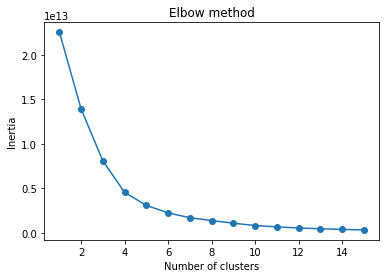

In [ ]:
inertias = []

tot_k = 16
for i in range(1,tot_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(matrix_df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,tot_k), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

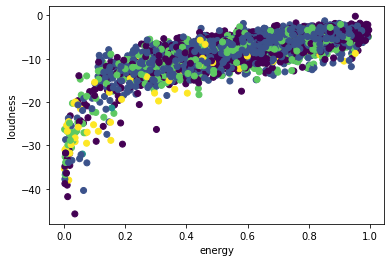

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(matrix_df)

plt.scatter(matrix_df[:,1], matrix_df[:,3], c=kmeans.labels_) #0:danceability, 1:energy, 2:key, 3:loudness
plt.xlabel('energy')
plt.ylabel('loudness')
plt.show() 

#we cannot see it in the plot (not representative) even using loudness and energy (that are the ones that seemas more correlated)
#the correlation between them is exponential

# Unsupervised Clustering

In [ ]:
## USING SCALER
#first save song to test
test_song = df.loc[random.sample(df.index.to_list(), 1)[0],:]
df = df.drop(test_song.name, axis =0)
print("test song:\n", test_song)

matrix_df = df.values

scaler = StandardScaler()
df_scaled = scaler.fit_transform(matrix_df)

test song:
 danceability             0.770000
energy                   0.627000
key                      2.000000
loudness                -8.034000
mode                     0.000000
speechiness              0.075300
acousticness             0.293000
instrumentalness         0.000004
liveness                 0.478000
valence                  0.722000
tempo                  116.995000
duration_ms         120000.000000
time_signature           4.000000
popularity              45.000000
Name: 07LQL0AHn1BfbpCtnusg2b, dtype: float64


Explained variation per principal component: [0.25287018 0.09604466]
Cumulative variance explained by 2 principal components: 34.89%


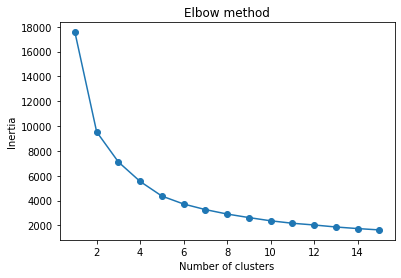

In [ ]:
##USING PCA

pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df_scaled)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

prop_test = len(pca_2_result)*0.1 #90% train and 10% test
test_rows = random.sample(range(len(pca_2_result)), int(prop_test))
bool_idx = np.zeros(len(pca_2_result), dtype=bool)
bool_idx[test_rows] = True

test = pca_2_result[bool_idx, :]
ids_test = df.index.to_numpy()[bool_idx]
train = pca_2_result[~bool_idx, :] 
ids_train = df.index.to_numpy()[~bool_idx]

#___________________________________________________
inertias = []

tot_k = 16
for i in range(1,tot_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(train)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,tot_k), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

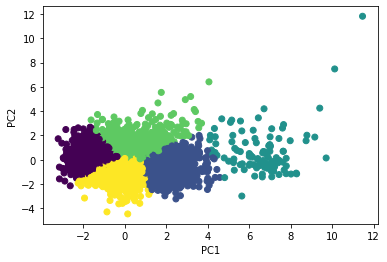

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(train)

plt.scatter(train[:,0], train[:,1], c=kmeans.labels_) 
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show() 

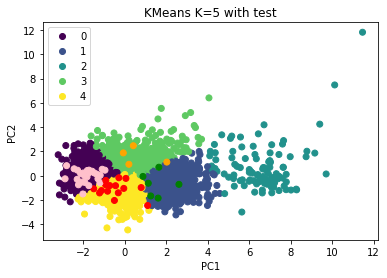

In [ ]:
#test
pred = kmeans.predict(test)

num_test = 50
from matplotlib.colors import ListedColormap

test_colors = ListedColormap(['pink','g','purple','orange','r'])

scatter = plt.scatter(train[:,0], train[:,1], c=kmeans.labels_) 
scatter_test = plt.scatter(test[:num_test,0], test[:num_test,1], c=pred[:num_test], cmap=test_colors)
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3,4])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans K=5 with test')
plt.show() 

In [ ]:
#@title Test with test_song

#it has to go through all the transformations
test_song1 = test_song.values
test_song1 = scaler.transform([test_song1])
test_song1 = pca_2.transform(test_song1)
test_song_p = kmeans.predict(test_song1)

print('Song predicted in cluster ', test_song_p)

Song predicted in cluster  [0]


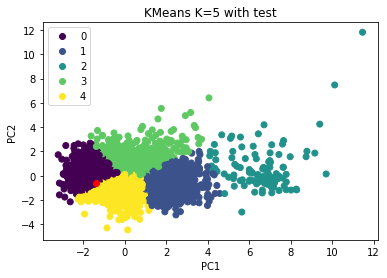

In [ ]:
scatter = plt.scatter(train[:,0], train[:,1], c=kmeans.labels_) 
plt.scatter(test_song1[:,0], test_song1[:,1], c='red')
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3,4])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans K=5 with test')
plt.show() 

In [ ]:
## time to get the most identical songs
songs_same_cluster = [i for i in range(len(train)) if kmeans.labels_[i] == test_song_p]
songs_same_cluster[:2]

##get ids
ids_same_cluster = ids_train[songs_same_cluster]

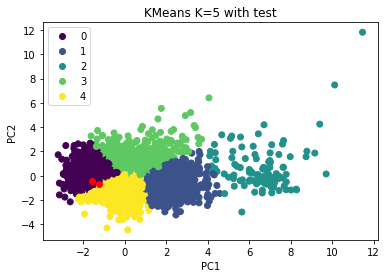

In [ ]:
#JUST TO CHECK IT DOES IT CORRECTLY

scatter = plt.scatter(train[:,0], train[:,1], c=kmeans.labels_) 
plt.scatter(train[songs_same_cluster[:2],0], train[songs_same_cluster[:2],1], c='red')
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3,4])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans K=5 with test')
plt.show() 

In [ ]:
#now we get the similarities between the song and the other songs

cs = []
A = test_song.values
for s in ids_same_cluster:
  B = df.loc[s, :].values

  cs.append((s, cosine_similarity2(A,B))) #list ot tuples . We will be able to convert them into a dict

In [ ]:
more_similar_songs = sorted(dict(cs).items(), key=lambda kv: kv[1], reverse=True)
top3 = dict(more_similar_songs[:3])
top3

{'2TKA7AOxNJk89Qp5iwzxzr': 0.9999999990479297,
 '3AVXwaOGCEL8cmBecfcsFJ': 0.9999999989648871,
 '4xaQIoPckzCcFQ2e4W7gqR': 0.9999999989189249}

In [ ]:
lab_d = labels.to_dict()

print(f'The label of our test song was {lab_d[test_song.name]}')

for i in top3.keys():
  print(f'\tThe song with similarity {top3[i]} has label {lab_d[i]}')

The label of our test song was chill
	The song with similarity 0.9999999990479297 has label sport
	The song with similarity 0.9999999989648871 has label revive
	The song with similarity 0.9999999989189249 has label dark


In [ ]:
#COMMENTS: solo he usado pc2 porque era mejor para visualizar, pero si queremos conseguir más varianza y todo eso, solo habría que aumentar el
  #num de pca aunque no se pudiera visualizar

# Supervised Clustering

In [22]:
n = 10
np.random.seed(n)

## USING SCALER
#first save song to test
test_song = df.loc[random.sample(df.index.to_list(), 1)[0],:]
label_song = labels[test_song.name]
df = df.drop(test_song.name, axis =0)
labels = labels.drop(test_song.name, axis =0)
print("test song:\n", test_song)
matrix_df = df.values

scaler = StandardScaler()
df_scaled = scaler.fit_transform(matrix_df)

test song:
 danceability             0.5480
energy                   0.4530
key                      5.0000
loudness                -7.3940
mode                     0.0000
speechiness              0.0359
acousticness             0.3730
instrumentalness         0.0000
liveness                 0.0819
valence                  0.3550
tempo                  109.6640
duration_ms         197260.0000
time_signature           3.0000
popularity              52.0000
Name: 4MCJB2N8KBptcmd1fmo7XY, dtype: float64


In [23]:
##USING PCA
np.random.seed(n)

pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df_scaled)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}\n'.format(np.sum(pca_2.explained_variance_ratio_)))

# Split dataset into training set and test set
train, test, ids_train, ids_test = train_test_split(pca_2_result, labels, test_size=0.2) # 80% training and 20% test

#___________________________________________________
for k in range(len(labels.unique())-2, len(labels.unique())+3):
  knn = KNeighborsClassifier(n_neighbors=k)

  #Train the model using the training sets
  knn.fit(train, ids_train.values)

  #Predict the response for test dataset
  y_pred = knn.predict(test)
  print("K-", k, " Accuracy:",metrics.accuracy_score(ids_test.values, y_pred))


Explained variation per principal component: [0.25295803 0.09604737]
Cumulative variance explained by 2 principal components: 34.90%

K- 6  Accuracy: 0.24436090225563908
K- 7  Accuracy: 0.23934837092731828
K- 8  Accuracy: 0.2744360902255639
K- 9  Accuracy: 0.2681704260651629
K- 10  Accuracy: 0.2731829573934837


{'chill': 'blue', 'happy': 'magenta', 'revive': 'orange', 'sad': 'gold', 'dark': 'gold', 'disconnecting': 'slateblue', 'romance': 'darkviolet', 'sport': 'green'}


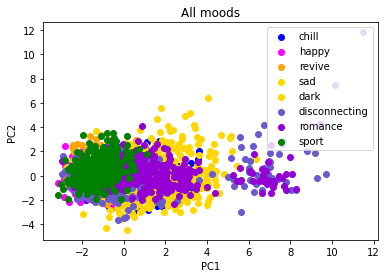

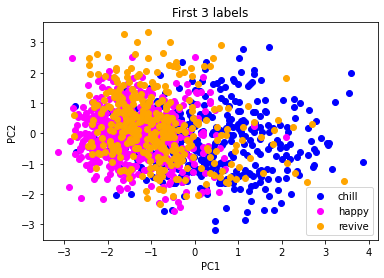

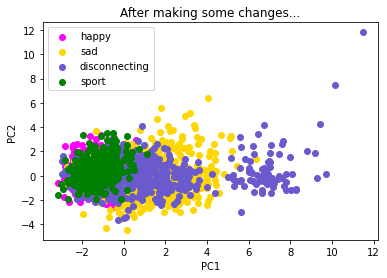

In [24]:
## PCA 2- to plot

cLabel = {}
for l in range(len(labels.unique())):
  colors = ['blue', 'magenta', 'orange', 'gold', 'gold', 'slateblue', 'darkviolet','green', 'yellow',]
  cLabel[labels.unique()[l]] = colors[l]

print(cLabel)

fig, ax = plt.subplots()
for g in labels.unique():
    ix = np.where(ids_train.values == g)
    ax.scatter(train[ix,0], train[ix,1], c=cLabel[g], label=g) 
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('All moods')
plt.show() 

#disconnecting is also similar

fig, ax = plt.subplots()
for g in labels.unique()[:3]:
    ix = np.where(ids_train.values == g)
    ax.scatter(train[ix,0], train[ix,1], c=cLabel[g], label=g) 
plt.title('First 3 labels')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
#we can see that revive and happy is almost the same, lets put it together. Dark and sad seems also the same

fig, ax = plt.subplots()
for g in labels.unique()[1:8]:
  ix = np.where(ids_train.values == g)
  if g == 'revive':
    ax.scatter(train[ix,0], train[ix,1], c=cLabel['happy'])
  elif g=='dark':
    ax.scatter(train[ix,0], train[ix,1], c=cLabel['sad'])
  elif g=='romance':
    ax.scatter(train[ix,0], train[ix,1], c=cLabel['disconnecting'])
  else:
    ax.scatter(train[ix,0], train[ix,1], c=cLabel[g], label=g) 
plt.title('After making some changes...')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [25]:
#@title making changes....
np.random.seed(n) 
def changes_labels(x):
  if x == 'revive': return 'happy'
  if x=='dark': return 'sad' #until here acc=0.57¡6
  #if x=='disconnecting': return 'sport' (with this acc=0.52)
  if x=='romance': return 'disconnecting' #with it acc=0.58
  return x


labels_new = labels[labels != 'chill']
df_scaled_new = df_scaled[labels != 'chill']

labels_new = dict([(x , changes_labels(labels_new[x])) for x in labels_new.keys()])
dflabels = pd.DataFrame.from_dict(labels_new, orient='index')
labels_new = dflabels[0].values

## KNN
# Split dataset into training set and test set
train, test, ids_train, ids_test = train_test_split(df_scaled_new, labels_new, test_size=0.2) # 70% training and 30% test

#___________________________________________________
metrics_knn = ['cosine', 'euclidean', 'manhattan']
best_acc = 0
solutions = pd.DataFrame(columns=['K', 'Metric', 'Acc'])
for k in range(len(np.unique(labels_new)), len(np.unique(labels_new))+10):
  for m in metrics_knn:
    knn = KNeighborsClassifier(n_neighbors=k, metric = m)

    #Train the model using the training sets
    knn.fit(train, ids_train)

    #Predict the response for test dataset
    y_pred = knn.predict(test)
    acc = metrics.accuracy_score(ids_test, y_pred)
    print("K -", k," Metric -",m, " ----- Accuracy:",acc)
    solutions = solutions.append({'K':k, 'Metric':m, 'Acc': acc}, ignore_index = True)

    if acc> best_acc:
      best_acc = acc
      best_param = [k, m]


print(f"\nThe best acc ({best_acc}) has combination: K-{best_param[0]} and metric-{best_param[1]}")

K - 4  Metric - cosine  ----- Accuracy: 0.5754985754985755
K - 4  Metric - euclidean  ----- Accuracy: 0.5783475783475783
K - 4  Metric - manhattan  ----- Accuracy: 0.5797720797720798
K - 5  Metric - cosine  ----- Accuracy: 0.594017094017094
K - 5  Metric - euclidean  ----- Accuracy: 0.5826210826210826
K - 5  Metric - manhattan  ----- Accuracy: 0.6054131054131054
K - 6  Metric - cosine  ----- Accuracy: 0.6025641025641025
K - 6  Metric - euclidean  ----- Accuracy: 0.5826210826210826
K - 6  Metric - manhattan  ----- Accuracy: 0.5997150997150997
K - 7  Metric - cosine  ----- Accuracy: 0.6082621082621082
K - 7  Metric - euclidean  ----- Accuracy: 0.5769230769230769
K - 7  Metric - manhattan  ----- Accuracy: 0.6239316239316239
K - 8  Metric - cosine  ----- Accuracy: 0.6011396011396012
K - 8  Metric - euclidean  ----- Accuracy: 0.5925925925925926
K - 8  Metric - manhattan  ----- Accuracy: 0.6125356125356125
K - 9  Metric - cosine  ----- Accuracy: 0.603988603988604
K - 9  Metric - euclidean  -

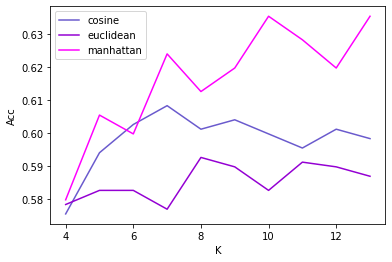

In [26]:
## some plots 
cLabel = {}
for l in range(len(metrics_knn)):
  colors = ['slateblue', 'darkviolet', 'magenta']
  cLabel[metrics_knn[l]] = colors[l]

fig, ax = plt.subplots()
for g in metrics_knn:
    sol = solutions[solutions['Metric'] == g]
    ax.plot(sol['K'], sol['Acc'], c=cLabel[g], label=g) 
plt.xlabel('K')
plt.ylabel('Acc')
plt.legend()
plt.show() 

In [18]:
#@title Test with test_song
knn = KNeighborsClassifier(n_neighbors=k, metric = m)
knn.fit(df_scaled_new, labels_new)

#it has to go through all the transformations
test_song1 = test_song.values
test_song1 = scaler.transform([test_song1])
test_song_p = knn.predict(test_song1)
label_song = changes_labels(label_song)

print(f'Song predicted in cluster {test_song_p} and it was label {label_song}')

Song predicted in cluster ['disconnecting'] and it was label disconnecting


In [19]:
preds = knn.predict(df_scaled_new)

num_p = random.sample(range(len(preds)), 10)
for p in num_p:
  print(f'Song (id = {dflabels.iloc[p,:].name}) predicted in cluster {preds[p]} and it was label {labels_new[p]}')

Song (id = 47Cnw8EfDPHihBbhC0oaIK) predicted in cluster happy and it was label sport
Song (id = 3ppzEzYnSKIBZ2tndbmOLp) predicted in cluster sad and it was label sad
Song (id = 4MSmRBs920YvYh4eYdE8lD) predicted in cluster sad and it was label sad
Song (id = 2OHQhOiGIYaXqqJVIMpNrF) predicted in cluster happy and it was label disconnecting
Song (id = 5OUVliuaw3CbZ5Dx3xEtea) predicted in cluster happy and it was label happy
Song (id = 2HNrnOTTeuSWcoMwp9YGtE) predicted in cluster sad and it was label sad
Song (id = 2gfssLSjUEqJnrGyHMWemS) predicted in cluster sad and it was label sad
Song (id = 4cluDES4hQEUhmXj6TXkSo) predicted in cluster happy and it was label happy
Song (id = 587xXusqiMW9gSXkNK8Zxf) predicted in cluster happy and it was label happy
Song (id = 5kyJ6sznnWACqHbw65p34Q) predicted in cluster happy and it was label happy


In [27]:
#@title random forest 
from sklearn.ensemble import RandomForestClassifier

## RF class
# Split dataset into training set and test set
train, test, ids_train, ids_test = train_test_split(df_scaled_new, labels_new, test_size=0.2) # 70% training and 30% test

#___________________________________________________
best_acc = 0
solutions = pd.DataFrame(columns=['K', 'Metric', 'Acc'])
for k in range(len(np.unique(labels_new)), len(np.unique(labels_new))+500, 50):
  knn = RandomForestClassifier(n_estimators=k)

  #Train the model using the training sets
  knn.fit(train, ids_train)

  #Predict the response for test dataset
  y_pred = knn.predict(test)
  acc = metrics.accuracy_score(ids_test, y_pred)
  print("K -", k," ----- Accuracy:",acc)

  if acc> best_acc:
    best_acc = acc
    best_param = [k]


print(f"\nThe best acc ({best_acc}) has combination: K-{best_param[0]}}")

K - 4  ----- Accuracy: 0.5384615384615384
K - 54  ----- Accuracy: 0.6310541310541311
K - 104  ----- Accuracy: 0.6296296296296297
K - 154  ----- Accuracy: 0.6153846153846154
K - 204  ----- Accuracy: 0.6353276353276354
K - 254  ----- Accuracy: 0.6153846153846154
K - 304  ----- Accuracy: 0.6253561253561254
K - 354  ----- Accuracy: 0.6225071225071225
K - 404  ----- Accuracy: 0.6339031339031339
K - 454  ----- Accuracy: 0.6267806267806267

The best acc (0.6353276353276354) has combination: K-204 and metric-manhattan


# Using the KNN for the country csv

In [ ]:
#we use the same approach as in the Top-Analysis notebook to read the csv

data = pd.read_csv('song_feat_top.csv').drop('Unnamed: 0',axis =1)
data.drop('release_date', axis = 1, inplace = True)

num = data.select_dtypes(['float64', 'int64']).columns.tolist()
num_data = data[num]

scaler = StandardScaler()
num_data = scaler.fit_transform(num_data)
num_data = pd.DataFrame(num_data, columns = num)

data = pd.concat([num_data, data['id'], data['country']], axis = 1)
data.set_index('id', inplace = True)


## Using country mean

In [ ]:
#group by country using the mean
country_df = data.groupby(['country']).mean()
country_df

In [ ]:
#@title KNN...
country_mood = {}

for c in country_df.index:
  c1 = country_df.loc[c,:].values #already normalized
  cp = knn.predict([c1])
  
  country_mood[c] = cp

In [ ]:
countryMood_df= pd.DataFrame.from_dict(country_mood, orient='index', columns=['mood'])
countryMood_df

,mood
Alemania,disconnecting
Arabia Saudí,happy
Argentina,happy
Australia,happy
Austria,disconnecting
...,...
Taiwán,sad
Turquía,disconnecting
Ucrania,happy
Uruguay,happy


In [ ]:
#countryMood_df.to_csv('/content/drive/MyDrive/Colab Notebooks/WebAnalytics/final/contryMood.csv', index = False)

## Getting percentage for mood

In [ ]:
countries = data['country']
data2 = data.drop('country', axis = 1)

#knn
data['mood']= knn.predict(data2.values)

In [ ]:
labs = np.unique(labels_new) #the new columns
temp = dict([(i,[]) for i in labs])
temp['country'] = []

new_data = data[['country', 'mood']]

for c in countries.unique():
  moods = new_data[new_data.country == c].mood
  m = Counter(moods) #normally 50, not always
  temp['country'].append(c)
  for i in labs:
    try:
      temp[i].append(m[i]/len(moods))
    except:
      temp[i].append(0)

In [ ]:
count_country = pd.DataFrame(temp)
count_country.set_index('country', inplace=True)

In [ ]:
count_country['moodTop'] = [max(dict(count_country.loc[i,:]), key=dict(count_country.loc[i,:]).get) for i in count_country.index]
count_country['moodMean'] = countryMood_df
count_country.reset_index(inplace=True)
count_country = count_country.rename(columns = {'index':'country'})
count_country

,country,disconnecting,happy,sad,sport,moodTop,moodMean
0,Global,0.120000,0.520000,0.340,0.020,happy,sad
1,Taiwán,0.220000,0.340000,0.420,0.020,sad,sad
2,Turquía,0.200000,0.220000,0.500,0.080,sad,disconnecting
3,Reino Unido,0.220000,0.520000,0.200,0.060,happy,happy
4,Dinamarca,0.300000,0.340000,0.340,0.020,happy,sad
...,...,...,...,...,...,...,...
64,Suriname,0.104167,0.645833,0.125,0.125,happy,happy
65,La República Checa,0.140000,0.420000,0.380,0.060,happy,sad
66,Guatemala,0.160000,0.620000,0.200,0.020,happy,happy
67,Eslovaquia,0.180000,0.360000,0.420,0.040,sad,disconnecting


In [ ]:
#count_country.to_csv('/content/drive/MyDrive/Colab Notebooks/WebAnalytics/final/contryMood.csv', index = False)